# EDA Text Data Exploration 

This file explores the frequency of the words in the text data for both the spam emails and the ham emails. We look at the word frequency using collections, and then also use word clouds as a fun visual to see what words are most frequent. 

#### Packages
- __Dataframes__
    - pandas
- __Text Frequency__
    - collections
- __Wordcloud__
    - wordcloud 
    - matplotlib

    
    

### Imports

In [55]:
#pip install wordcloud

In [56]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
import pandas as pd
import numpy as np
import collections

#for plotting images & adjusting colors
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### Data 
The data being read in here was processed from the original dataset called spam_ham_dataset.csv 

In [57]:
df = pd.read_csv("spam_ham_processed.csv")
df.head()

,Unknown,ham/spam,Original_Text,is_Spam,Word_List
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,"['meter', 'follow', 'note', 'gave', 'prelimina..."
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,"['see', 'attached', 'file']"
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,"['neon', 'retreat', 'around', 'wonderful', 'ti..."
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,"['office', 'cheap', 'main', 'darer', 'prudentl..."
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,"['deal', 'book', 'revenue', 'understanding', '..."


## Word Cloud Using Matplotlib
I am going to create two word clouds from all the text data in the emails. One word cloud will be from the spam emails, and the other word cloud will be from the ham emails. 

In [58]:
# Seperate the Data from ham and spam 
df_spam = df.loc[(df["ham/spam"] == "spam")]
df_spam = df_spam.reset_index()
df_ham = df.loc[(df["ham/spam"] == "ham")]
df_ham = df_ham.reset_index()

When the pandas dataframe was created from the 'Prepare_Data" file it turned the list of words in the column "Word_list" into a string. 

The following code concatenates every string containing the text data from every email into one giant string. Then it is split buy ', ' because this is the delimiter created from the list --> string. 

This is now the list of all the words in every email, seperated by whether it was ham or spam. 

In [59]:
def plot_WC(word_list):
    # join the list and lowercase all the words
    text = ' '.join(word_list).lower()

    #create the wordcloud object
    wordcloud = WordCloud(stopwords = STOPWORDS,
                          collocations=True).generate(text)

    #plot the wordcloud object
    plt.imshow(wordcloud, interpolation='bilInear')
    plt.axis('off')
    plt.show()

In [60]:
# Creates a list of every word in all of the ham emails 
ham_words = ""
for i in range(len(df_ham['Word_List'])):
    fixed_str = str(df_ham['Word_List'][i][2:-2])
    ham_words+=fixed_str

ham_list = ham_words.split("', '")

In [61]:
# Creates a list of every word in all of the spam emails 
spam_words = ""
for i in range(len(df_spam['Word_List'])):
    fixed_str = str(df_spam['Word_List'][i][2:-2])
    spam_words+=fixed_str

spam_list = spam_words.split("', '")

### Word Cloud for Word in Spam Email 

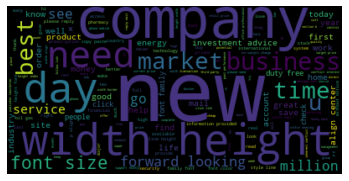

In [62]:
plot_WC(spam_list)

### Word Cloud for Word in Ham Email 

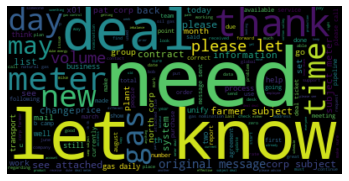

In [63]:
plot_WC(ham_list)

Word Clouds are interesting however more quantitative values in frequency will give us more to analyze further. 

It should be noted that during the preprocessing we used a method to only keep words that are seen in the dictionary. This means hat we may have lost interesting information pertaining to names, possibly words not in the english dictionary as well as other characteristics that may or may not have been useful in the identification and prediction of whether an email is spam or not.  

## Text Frequency Using Collections

In [64]:
def get_word_frequency_df(list_of_words):
    counter=collections.Counter(list_of_words)
    word_frequency = list(counter.values())
    word = list(counter.keys())
    data_tuples = list(zip(word,word_frequency))
    word_frequency = pd.DataFrame(data_tuples, columns=['Word','Word_Frequency'])
    wf_df = word_frequency.copy()
    wf_df = wf_df.sort_values('Word_Frequency', ascending=False)
    return wf_df

In [76]:
# Top 10 most frequently used words in spam emails
spam_wf = get_word_frequency_df(spam_list)
spam_wf = spam_wf.rename(columns={'Word': 'Word_Spam', 'Word_Frequency': 'Word_Frequency_Spam'})
spam_wf.head(10)

,Word_Spam,Word_Frequency_Spam
108,company,727
2988,font,513
138,information,513
250,please,474
104,price,467
78,stock,460
114,u,458
292,get,435
216,may,415
77,new,400


In [74]:
# Top 10 most frequently used words in ham emails
ham_wf = get_word_frequency_df(ham_list)
ham_wf = ham_wf.rename(columns={'Word': 'Word_Ham', 'Word_Frequency': 'Word_Frequency_Ham'})
ham_wf.head(10)

,Word_Ham,Word_Frequency_Ham
18,gas,2772
249,subject,2718
151,deal,2674
8,please,2668
0,meter,2190
300,corp,1673
58,need,1534
30,know,1371
283,thanks,1250
183,day,1235


##### Used pandas merge method to get the similar words in both dataframes.

I am curious to see which words are present in both the spam and ham email and compare the frequency of them. This should help me understand which words could be in either spam or ham and therefore may not be relevant as a predictive value on whether the email is spam or not. 

For the word "Please", 
    We see that it is seen 474 times when it is in Spam. 
    We see that it is seen 2668 times when it is in Ham. 
    
    So, even though we see that it occurs in both, there is a higher likelihood that we would see it in Ham, then in spam. So seeing the word please may still be a predicitive word.  

  

In [67]:
same_wf = spam_wf.merge(ham_wf, left_on='Word_Spam', right_on='Word_Ham')[['Word_Spam', 'Word_Frequency_Spam', 'Word_Frequency_Ham']]
same_wf

,Word_Spam,Word_Frequency_Spam,Word_Frequency_Ham
0,information,513,622
1,please,474,2668
2,price,467,722
3,get,435,750
4,may,415,890
5,new,400,916
6,time,388,693
7,message,289,663
8,day,251,1235
9,need,249,1534


Addtional code that may be necessary, otherwise it was unused. 

In [70]:
# Dictionary of the top 10 most frequent words in ham and how the count of how many times it appears
# counter_ham =collections.Counter(ham_list)
# print(counter_ham.most_common(10))

In [71]:
# Dictionary of the top 10 most frequent words in spam and how the count of how many times it appears
# counter_spam =collections.Counter(spam_list)
# print(counter_spam.most_common(10))

In [72]:
# Update the stopwords to remove words that may be unnecessary
# new_stopwords = ["ect", "enron", "hou", "subject", "nbsp", "td"]
# stpwrd = nltk.corpus.stopwords.words('english')
# stpwrd.extend(new_stopwords)